# Challenge outline
## Employee Retention
### Goal

Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).

In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

### Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers

### Hints

- What are the main factors that drive employee churn? Do they make sense? Explain your findings.
- What might you be able to do for the company to address employee Churn, what would be follow-up actions?
- If you could add to this data set just one variable that could help explain employee churn, what would that be?
- Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.


# Data preprocessing & feature engineering
First we load modules that we'll need for the analysis.

In [163]:
# Import standard modules
import pandas as pd
import numpy as np

# Matplotlib and settings
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [15, 5]

# Seaborn and settings
import seaborn as sns
sns.set(rc={'axes.facecolor':'0.7', 'figure.facecolor':'0.7'})

Next, we'll load the data and have a look at the first ten rows.

In [164]:
# Read in data
df = pd.read_csv('employee_retention_data.csv')
df.head(10)

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   
5     509529.0           4      data_science         14  165000.0  2012-01-30   
6      88600.0           4  customer_service         21  107000.0  2013-10-21   
7     716309.0           2  customer_service          4   30000.0  2014-03-05   
8     172999.0           9          engineer          7  160000.0  2012-12-10   
9     504159.0           1             sales          7  104000.0  2012-06-12   

    quit_date  
0  2015-10-30  
1  2014-04-04  
2         NaN  
3  2013-06-07  
4  2014-08-22  
5  2013-08-30  
6         NaN  
7         NaN  
8  2015-10-23  
9         NaN

Since we have some missing data on the quit dates, which are important to figuring out how long a person stays on with a company, we'll split up the data into two sets, one with existing quit_date values and one with those values missing.

In [165]:
df_na = df[df.quit_date.isna()]
df = df[~df.quit_date.isna()]

Now we can engineer some additional features. We'll calculate tenure to calculate how long each person worked in their role and the month of quitting to see whether people usually quit in a particular month/week of the year.

In [166]:
# Reformat dates
df.join_date = pd.to_datetime(df.join_date)
df.quit_date = pd.to_datetime(df.quit_date)


# Get year, month and week of quit date
df['join_year'] = df.join_date.dt.month
df['join_month'] = df.join_date.dt.month
df['join_week'] = df.join_date.dt.week
df['quit_year'] = df.quit_date.dt.month
df['quit_month'] = df.quit_date.dt.month
df['quit_week'] = df.quit_date.dt.week

# Calculate tenure
df['tenure_days'] = (df.quit_date - df.join_date).dt.days
df['tenure_months'] = ((df.quit_date - df.join_date).dt.days/(365/12)).astype('int') # approximate
df['tenure_years'] = ((df.quit_date - df.join_date).dt.days/365).round(1) # approximate

# Look at new columns
df.head(10)

employee_id  company_id              dept  seniority    salary  join_date  \
0       13021.0           7  customer_service         28   89000.0 2014-03-24   
1      825355.0           7         marketing         20  183000.0 2013-04-29   
3      662910.0           7  customer_service         20  115000.0 2012-05-14   
4      256971.0           2      data_science         23  276000.0 2011-10-17   
5      509529.0           4      data_science         14  165000.0 2012-01-30   
8      172999.0           9          engineer          7  160000.0 2012-12-10   
10     892155.0           6  customer_service         13   72000.0 2012-11-12   
12     939058.0           1         marketing          1   48000.0 2012-12-10   
13     163427.0          10         marketing         23  154000.0 2012-06-18   
14     461248.0           2             sales         20  201000.0 2013-09-16   

    quit_date  join_year  join_month  join_week  quit_year  quit_month  \
0  2015-10-30          3           3         13         10          10   
1  2014-04-04          4           4         18          4           4   
3  2013-06-07          5           5         20          6           6   
4  2014-08-22         10          10         42          8           8   
5  2013-08-30          1           1          5          8           8   
8  2015-10-23         12          12         50         10          10   
10 2015-02-27         11          11         46          2           2   
12 2013-11-15         12          12         50         11          11   
13 2015-09-25          6           6         25          9           9   
14 2014-08-22          9           9         38          8           8   

    quit_week  tenure_days  tenure_months  tenure_years  
0          44          585             19           1.6  
1          14          340             11           0.9  
3          23          389             12           1.1  
4          34         1040             34           2.8  
5          35          578             19           1.6  
8          43         1047             34           2.9  
10          9          837             27           2.3  
12         46          340             11           0.9  
13         39         1194             39           3.3  
14         34          340             11           0.9

# Data exploration & outlier removal
Let's explore the data a bit, starting with the number of data points per company.

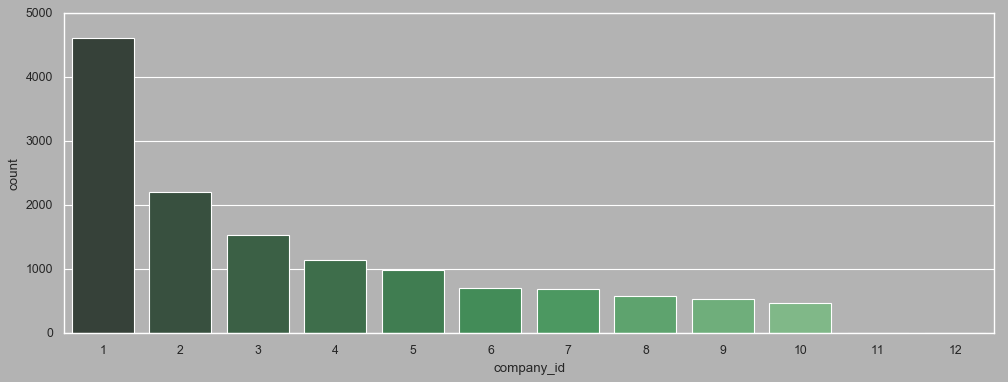

In [167]:
sns.countplot(df['company_id'], palette="Greens_d")

Looks like we have little information on companies 11 and 12. This might become problematic if we include company_id in our model, so let's just exclude them.

In [168]:
df = df[df.company_id <= 10]

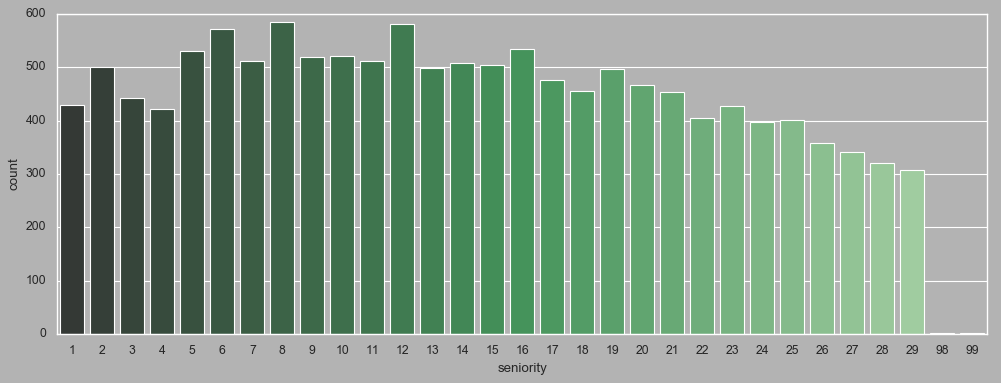

In [169]:
g = sns.countplot(df['seniority'], palette="Greens_d")

Looks like we have some more outliers, since it's unlikely that people actually have 98+ years of experience. Let's remove those rows.

In [170]:
df = df[df.seniority <= 29]

Now let's look at the distribution of departments for our data set. 

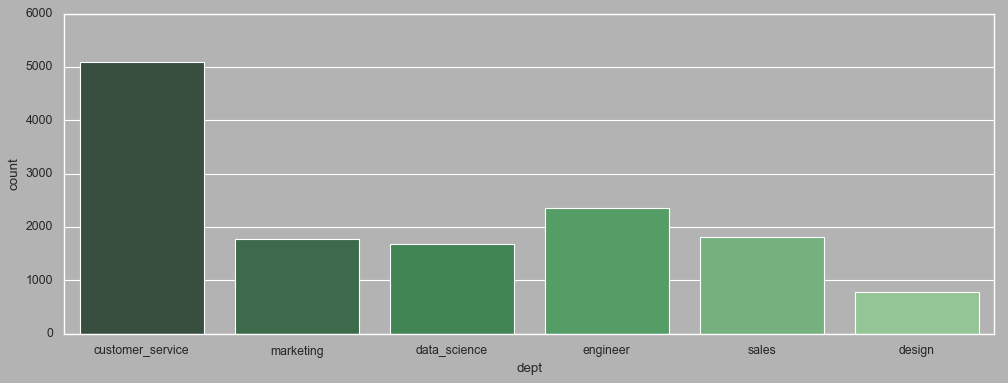

In [171]:
sns.countplot(df['dept'], palette="Greens_d")

Next, we'll look at some of the features we engineered.

We'll start by looking at the distribution of join weeks.

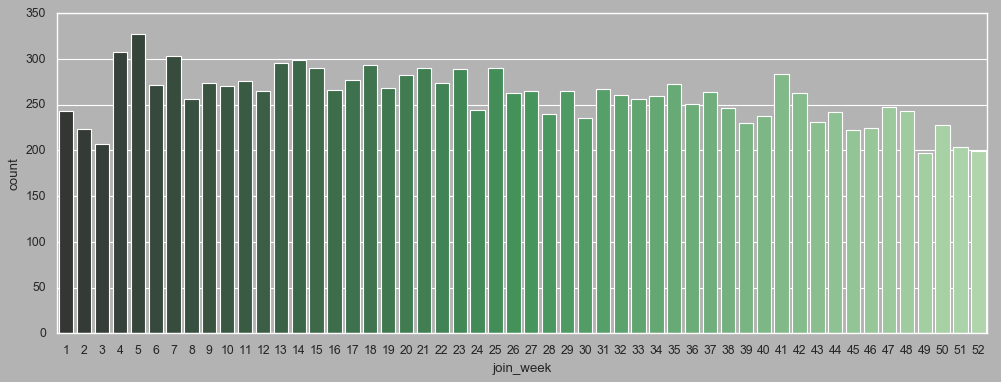

In [172]:
sns.countplot(df['join_week'], palette="Greens_d")

Most people seem to join in the beginning of the year, with fewer towards the end of the year and between the years.

Let's check if we can find out more about when people typically quit.

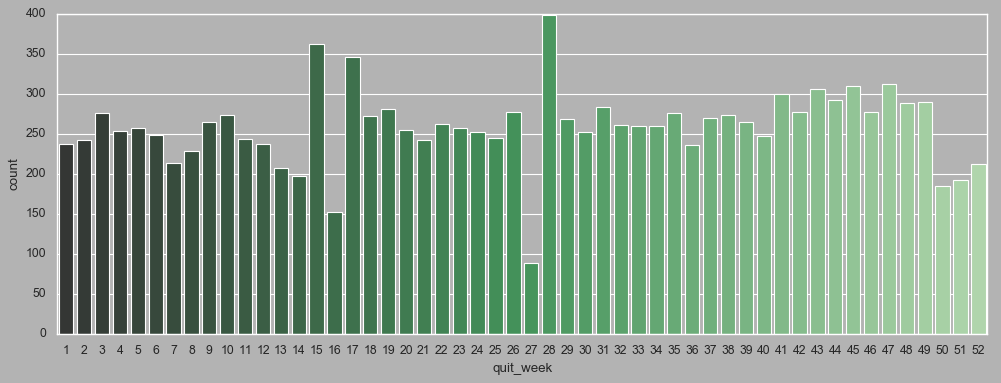

In [173]:
sns.countplot(df['quit_week'], palette="Greens_d")

It seems that people tend to quit their jobs more around week 15 and 17, so around mid-April. Also, many seem to quit in week 28, in early to mid-July. Not sure what this means, but the spike in week 28 could be related to the 4th of July, where you meet up with all of your old friends and realize your career is going nowhere. Or, you know, something like that.

Next, we'll look at how join week and quit week vary by department and company.

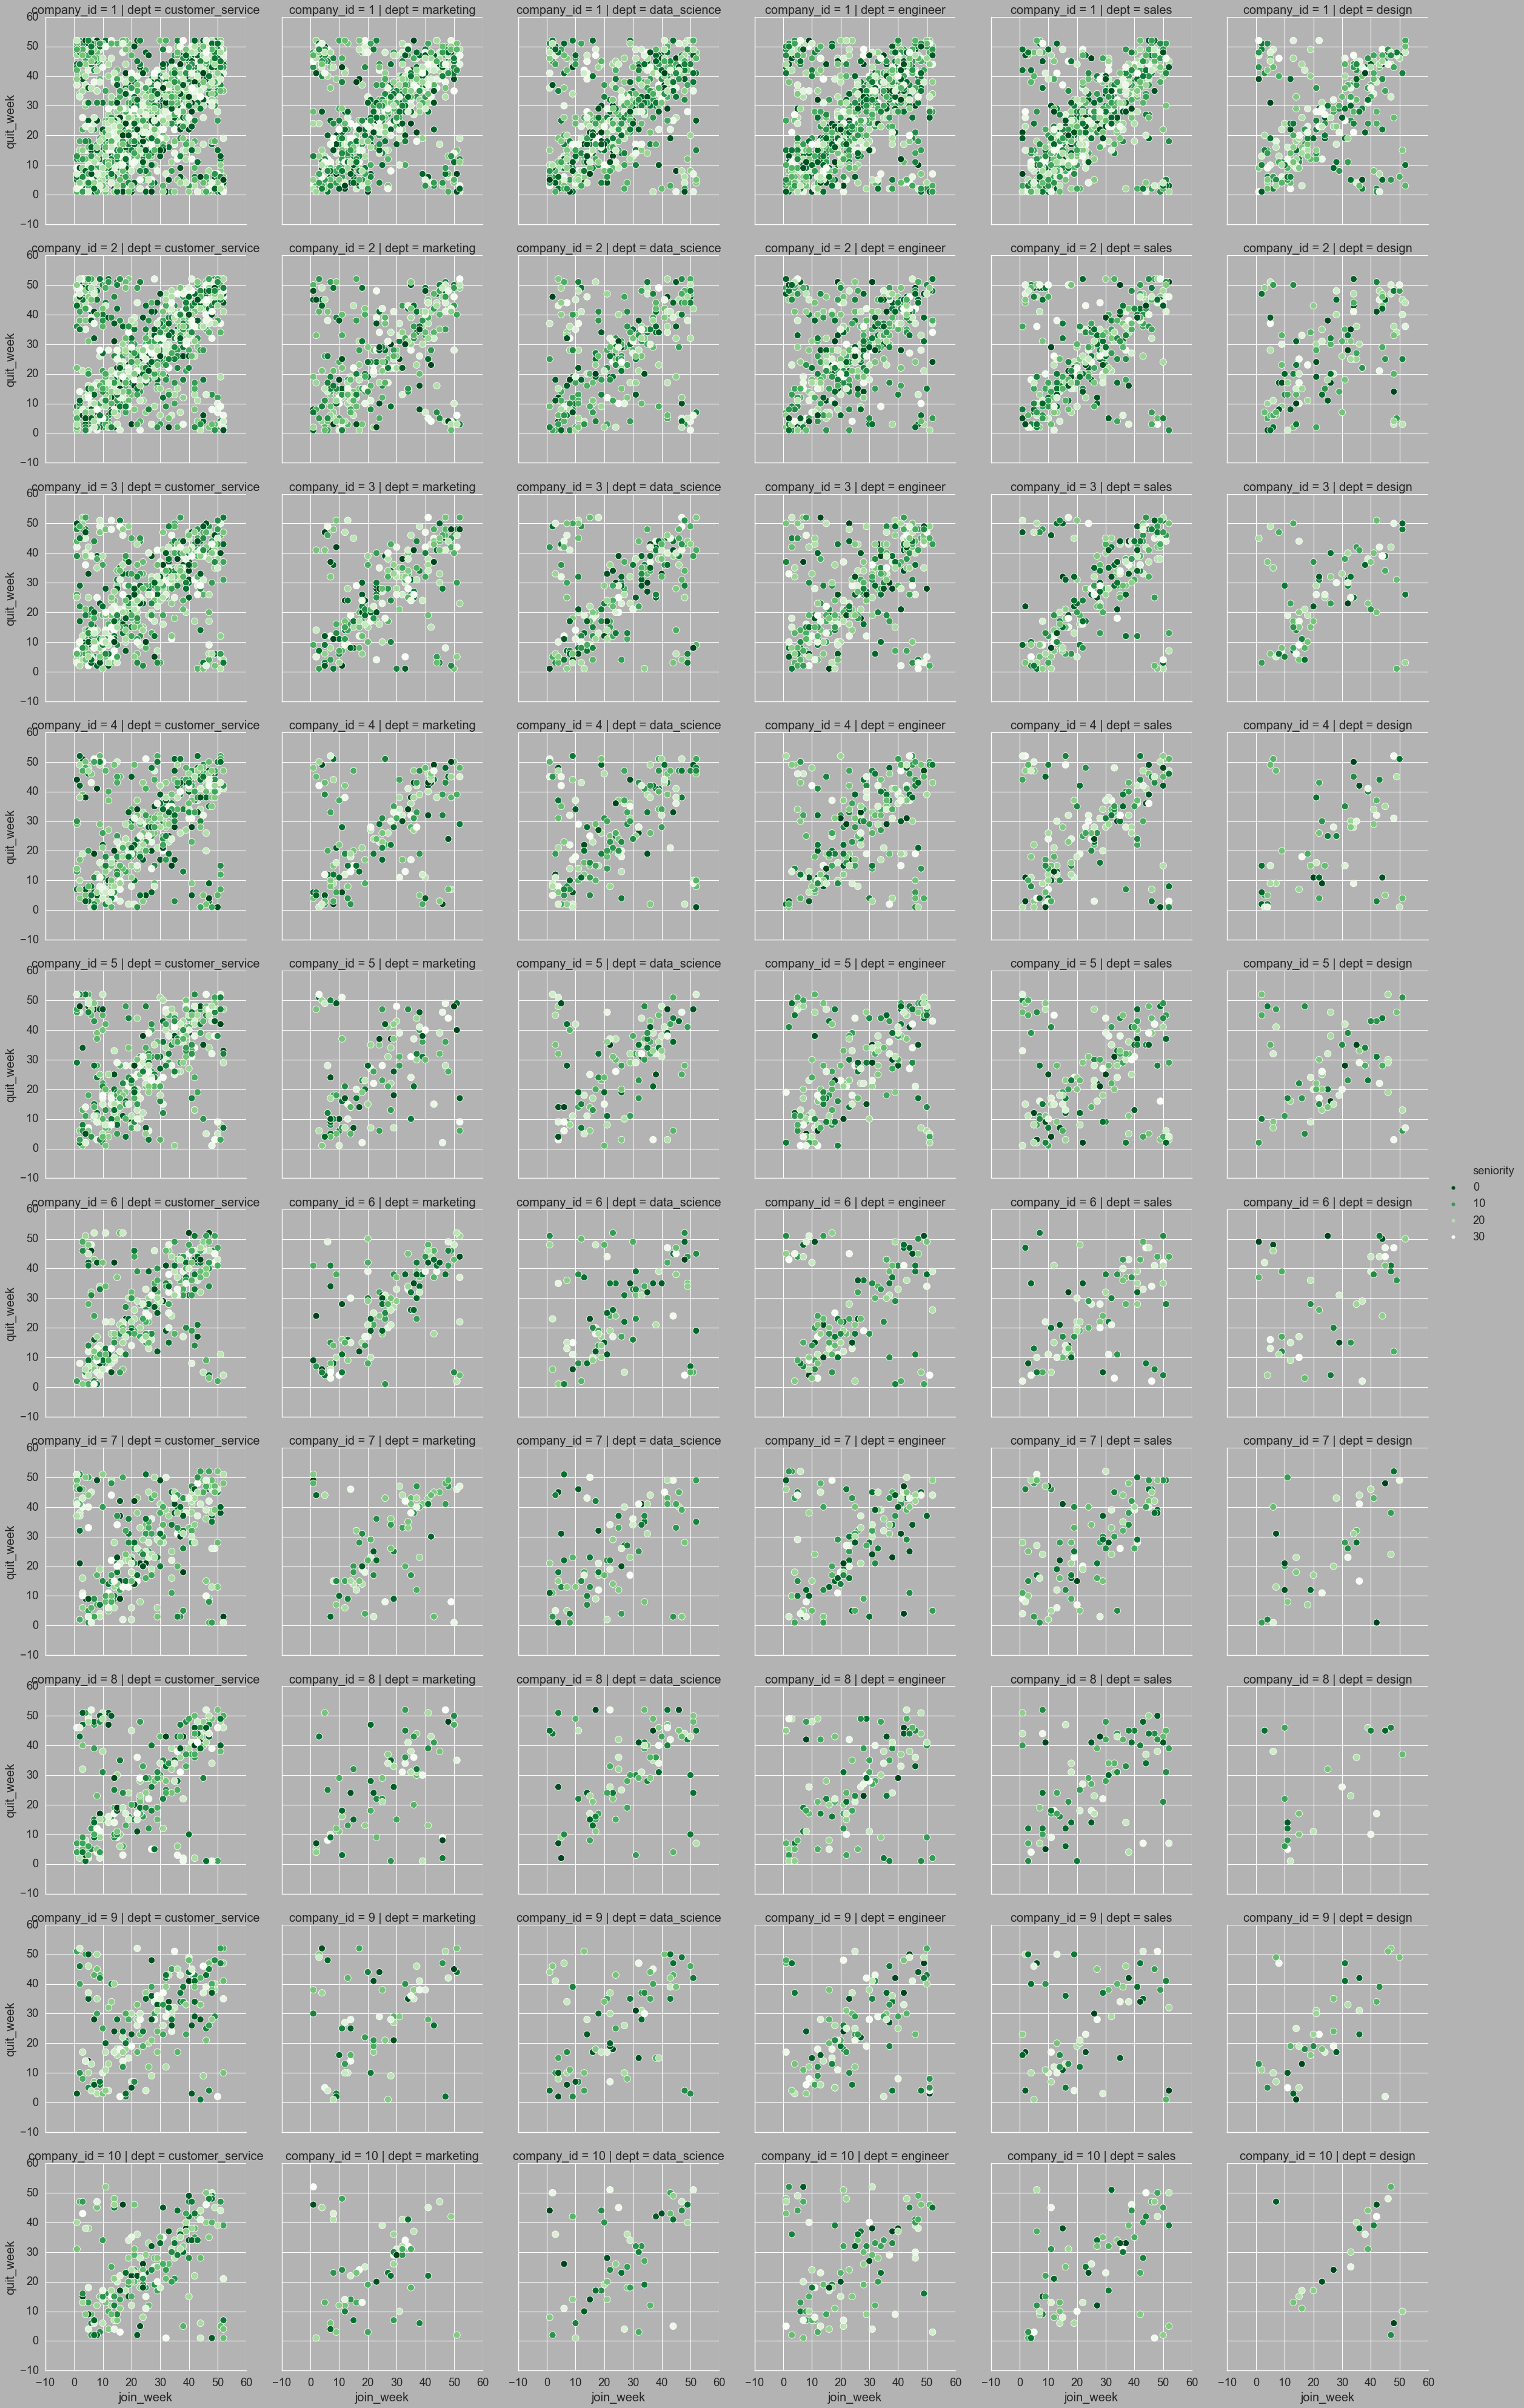

In [174]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.relplot(x="join_week", y="quit_week", hue="seniority", 
                col="dept", row="company_id", data=df, s = 100, palette="Greens_r");

It seems that join_week and quit week are highly correlated across departments and companies. This is important information since it let's us gives us a good idea of when a person might quit depending on when they joined the company.

Now let's look at how salaries and tenure vary by department and company.

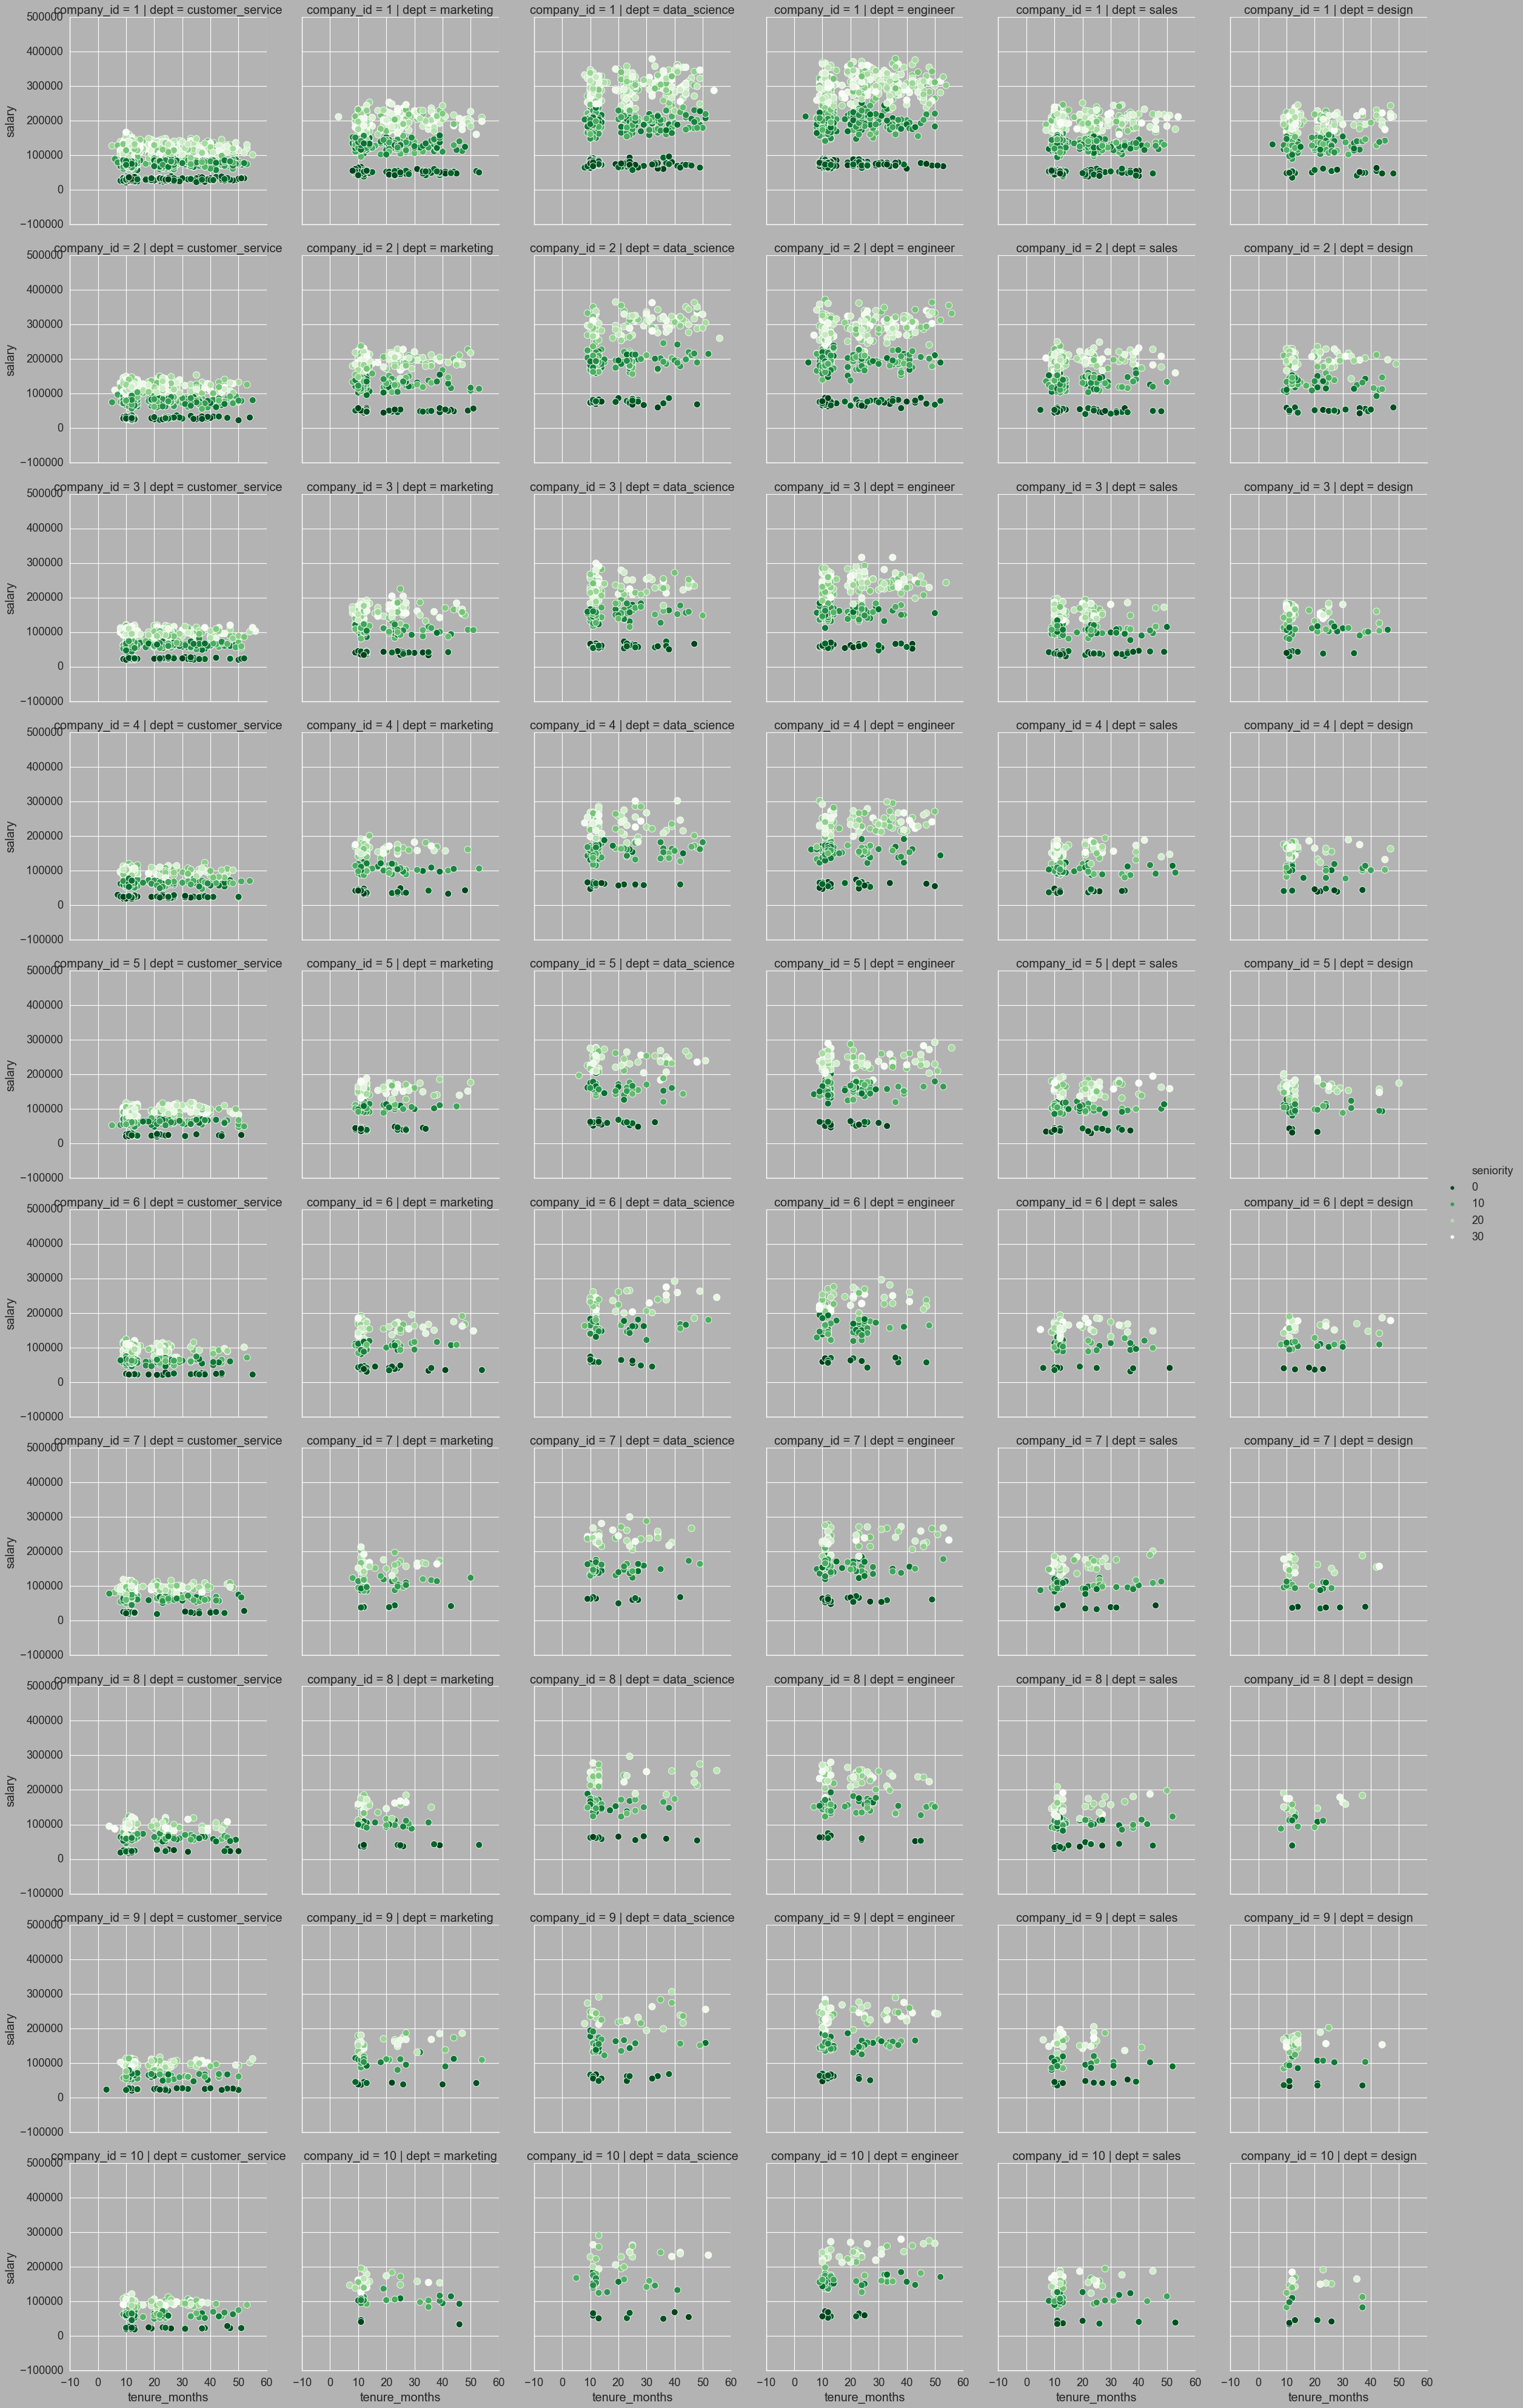

In [175]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.relplot(x="tenure_months", y="salary", hue="seniority", 
                col="dept", row="company_id", data=df, s = 100, palette="Greens_r");

There seems to be a clear separation of salary grades (y-axis) and seniority (hue), which suggests three bins of salary grades and three bins of seniority, which seem to align with more seniority meaning higher salary. 

While these patterns seem to be general, the breaks for the bins look like they are mostly dependent on the department, and slightly dependent on the company.

There also seems to be a slight trend of longer tenure being associated with higher salary grades, particularly for the data science and engineering departments. In particular, the lowest salary grade seems to quit earliest on average, which might simply be a feature of these employees still being in training or serving under limited-time contracts, like internships.

Furthermore, tenure (x-axis) also seems to fall into multiple bins, with the first and second cluster being easily discernable and corresponding to about 1 year and 2 years, respectively. Let's visualize that as a histogram.

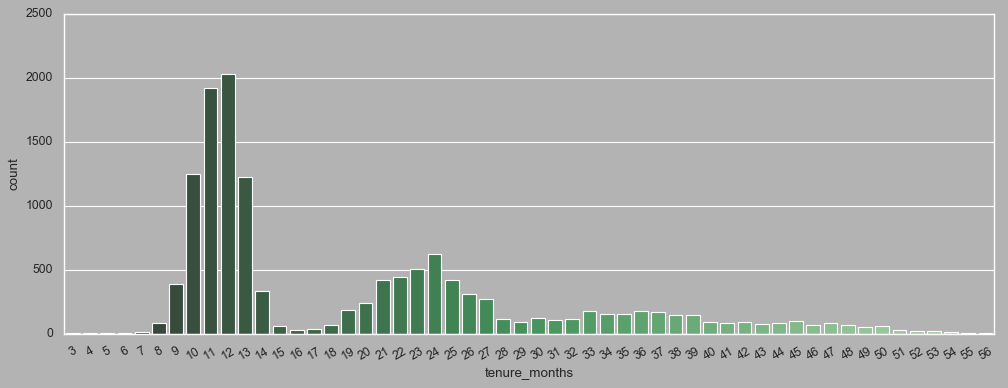

In [176]:
g = sns.countplot(df['tenure_months'], palette = "Greens_d")
g = g.set_xticklabels(g.get_xticklabels(), rotation=30)

This histogram really underscores that most people quit after about a year of holding a postion, with another batch quitting around the 2-year mark. This could be due to unhappiness with the position or salary, a lack of professional growth (promotions) or a general bad fit for the position. 

This makes a lot of sense, since join_week and quit_week are so highly correlated.

Lacking further data, it is hard to tell what persuades people to quit or to stay on, but we did see an indication for a slight influence of salary, seniority, company, and department on the amount of time people spend in a company's employ, so we can make an attempt at creating a model that uses these four features to predict an employee's tenure at a company.

# Modeling

## Model 1

While this is not the most obvious solution, and probably not the most effective, we'll try to use a linear generalized additive model to regress tenure on salary, seniority, department and company. The advantage of this approach is that partial dependency plots allow us to visually inspect the relationship between individual input features and our response variable.

We'll choose tenure in months as our response variable, since its temporal resolution presents a good compromise to determine employee retention on the scale of years (too coarse) and days (too granular).

First, we'll reformat our data to work with our model.

In [177]:
# Copy dataframe
df2 = df.copy()

# Recode company_id and dept as integers starting from 0 to be used as factors in our model
df2['dept_code'] = df2.dept.astype('category')
df2['dept_code'] = df2.dept_code.cat.codes
df2['dept_code'] = df2.dept_code.astype('int')

df2['company_id'] = df2.company_id.astype('category')
df2['company_id'] = df2.company_id.cat.codes
df2['company_id'] = df2.company_id.astype('int')

# Look at the data types in df2
df2.dtypes

employee_id             float64
company_id                int64
dept                     object
seniority                 int64
salary                  float64
join_date        datetime64[ns]
quit_date        datetime64[ns]
join_year                 int64
join_month                int64
join_week                 int64
quit_year                 int64
quit_month                int64
quit_week                 int64
tenure_days               int64
tenure_months             int64
tenure_years            float64
dept_code                 int64
dtype: object

Next, we'll select input and output variables for our first model and save them as X and y, respectively. 

In [178]:
X = df2[['salary', 'seniority', 'dept_code', 'company_id']]
y = df2[['tenure_months']]

To make sure that we have a data set to validate our model on, we'll split the data into training and test set and check to make sure they are split in a balanced way.

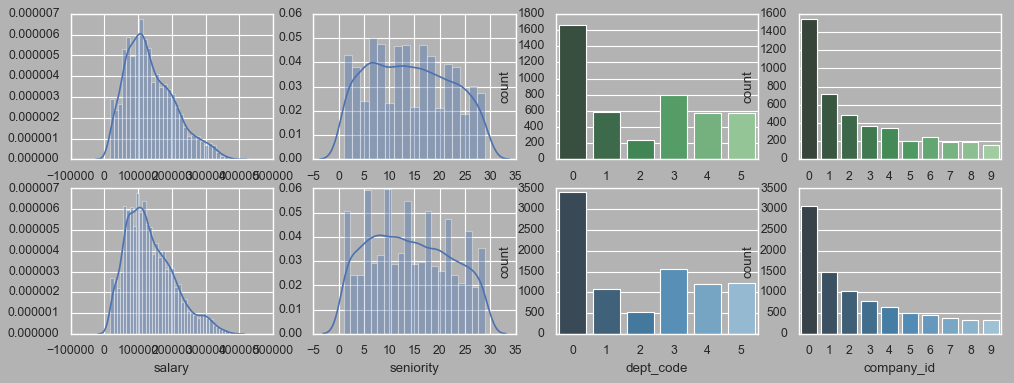

In [179]:
from sklearn.model_selection import train_test_split

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Sanity check, to see if data are roughly equally distributed between sets
fig, axs = plt.subplots(2,4)

sns.distplot(X_test['salary'],ax=axs[0,0])
sns.distplot(X_train['salary'],ax=axs[1,0])

sns.distplot(X_test['seniority'],ax=axs[0,1])
sns.distplot(X_train['seniority'],ax=axs[1,1])

sns.countplot(X_test['dept_code'], palette="Greens_d", ax=axs[0,2])
sns.countplot(X_train['dept_code'], palette="Blues_d", ax=axs[1,2])

sns.countplot(X_test['company_id'], palette="Greens_d", ax=axs[0,3])
sns.countplot(X_train['company_id'], palette="Blues_d", ax=axs[1,3])

Next, we fit the model and create a grid search over the smoothing parameters and obtain a summary of the results.

In [180]:
import pygam as pgm 

# Fit model
gam = pgm.LinearGAM(pgm.s(0) + pgm.s(1) + pgm.f(2) + pgm.f(3)).fit(X_train, y_train)
gam.gridsearch(X_train, y_train)

# Get summary
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     16.1265
Link Function:                     IdentityLink Log Likelihood:                                -51158.1118
Number of Samples:                         9034 AIC:                                           102350.4766
                                                AICc:                                          102350.5455
                                                GCV:                                              114.7502
                                                Scale:                                            114.3815
                                                Pseudo R-Squared:                                   0.0258
Feature Function                  Lam

/Users/davidwolski/miniconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


From the model summary it seems that salary is the most important feature in our model.

## Model 1 evaluation

Next, we can create partial dependency plots for the model we fit to the training data.

<Figure size 1200x400 with 0 Axes>

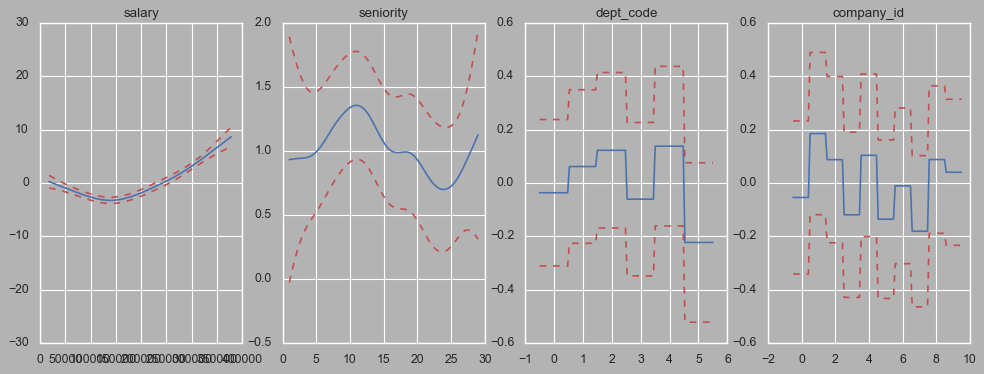

In [181]:
## Plot 
plt.figure();
fig, axs = plt.subplots(1,4);

titles = ['salary', 'seniority', 'dept_code', 'company_id']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

Finally, we can use the predict function on our test set and evaluate the model performance.

In [182]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = gam.predict(X_test)
print("Explained variance: {} ".format(explained_variance_score(y_test, predictions)))
print("Mean absolute error: {} ".format(mean_absolute_error(y_test, predictions)))
print("Mean squared error: {} ".format(mean_squared_error(y_test, predictions)))

Explained variance: 0.03183851700203988 
Mean absolute error: 8.863056788619328 
Mean squared error: 112.33517231306546 


The mean absolute error, which is the most interpretable of our performance measures tells us that our prediction of how long someone will stay on at a company is off by about 8 months, which is not great.

We could now build another model that looks at the predicted quit week for each employee based on the features included in model 1, but substituting quit_week for tenure_months as the response variable, and including both tenure_months and join_week in the input features. The latter is likely to be the most informative to the response variable, since we observed a fairly linear relationship between the two.

## Model 2
We can use the same dataframe we used in model 1, but select a different set of input and output variables for our second model.

In [183]:
X = df2[['join_week', 'tenure_months', 'salary', 'seniority', 'dept_code', 'company_id']]
y = df2[['quit_week']]

Again, to make sure that we have a data set to validate our model on, we'll split the data into training and test set and check to make sure they are split in a balanced way.

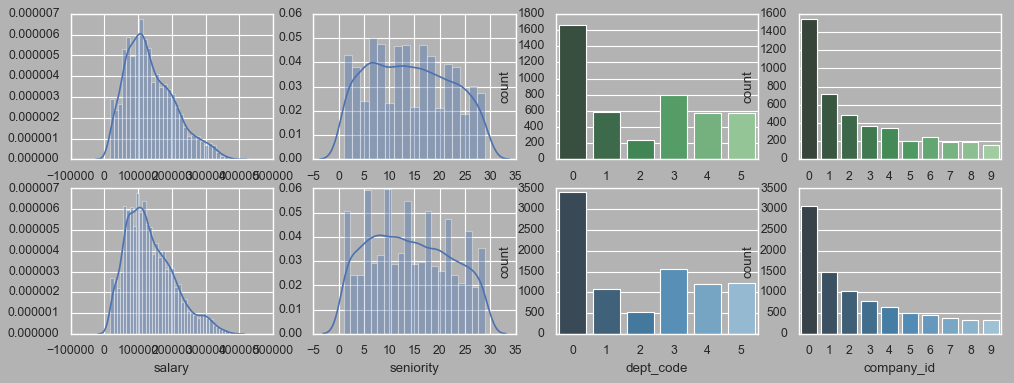

In [184]:
from sklearn.model_selection import train_test_split

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Sanity check, to see if data are roughly equally distributed between sets
fig, axs = plt.subplots(2,4)

sns.distplot(X_test['salary'],ax=axs[0,0])
sns.distplot(X_train['salary'],ax=axs[1,0])

sns.distplot(X_test['seniority'],ax=axs[0,1])
sns.distplot(X_train['seniority'],ax=axs[1,1])

sns.countplot(X_test['dept_code'], palette="Greens_d", ax=axs[0,2])
sns.countplot(X_train['dept_code'], palette="Blues_d", ax=axs[1,2])

sns.countplot(X_test['company_id'], palette="Greens_d", ax=axs[0,3])
sns.countplot(X_train['company_id'], palette="Blues_d", ax=axs[1,3])

Next, we fit the model and create a grid search over the smoothing parameters and obtain a summary of the results.

In [185]:
import pygam as pgm 

# Fit model
gam = pgm.LinearGAM(pgm.l(0) + pgm.s(1) + pgm.s(2) + pgm.s(3) + pgm.f(4) + pgm.f(5)).fit(X_train, y_train)
gam.gridsearch(X_train, y_train)

# Get summary
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     54.5037
Link Function:                     IdentityLink Log Likelihood:                                -55360.0626
Number of Samples:                         9034 AIC:                                           110831.1327
                                                AICc:                                          110831.8314
                                                GCV:                                              184.4204
                                                Scale:                                            182.4188
                                                Pseudo R-Squared:                                   0.1752
Feature Function                  Lam

/Users/davidwolski/miniconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


From the model summary it seems that join_week and tenure_months are the most important features in our second model. Also, company_id seems to be slightly important, possibly due to time-limited contractual agreements.

## Model 2 evaluation

Again, we can create partial dependency plots for the model we fit to the training data.

<Figure size 1200x400 with 0 Axes>

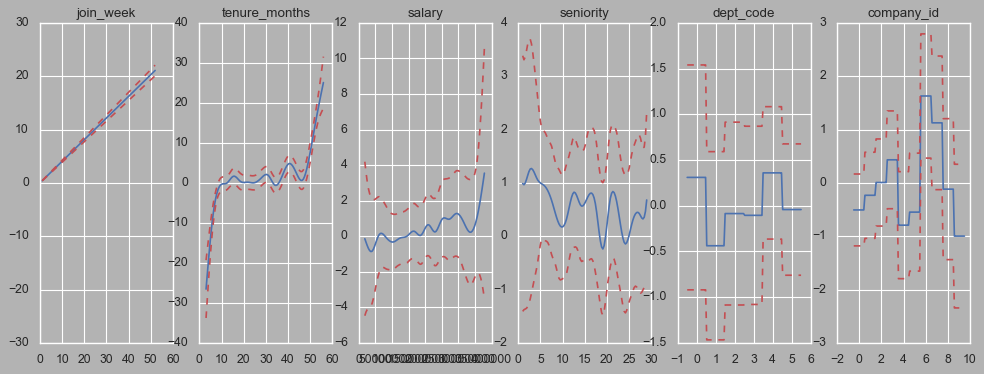

In [186]:
## Plot 
plt.figure();
fig, axs = plt.subplots(1,6);

titles = ['join_week', 'tenure_months', 'salary', 'seniority', 'dept_code', 'company_id']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

Finally, we can use the predict function on our test set and evaluate the model performance.

In [187]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = gam.predict(X_test)
print("Explained variance: {} ".format(explained_variance_score(y_test, predictions)))
print("Mean absolute error: {} ".format(mean_absolute_error(y_test, predictions)))
print("Mean squared error: {} ".format(mean_squared_error(y_test, predictions)))

Explained variance: 0.16625146156289516 
Mean absolute error: 10.618174902269985 
Mean squared error: 185.79239462494112 


This time our prediction of when a person might quit is off by about 10 weeks, which isn't terrible. This model does not, however, tell us how long a person will stay on with the company. While less informative than the first model, this model does give us some information on when companies could intervene to counteract employee churn, namely on or, ideally, before the anniversary of their employ, by potentially offering promotions and/or salary increases.

**In order to build a truly informative model we would want to collect data on additional features, specifically data on employee satisfaction or professional growth (promotions) might be informative to predicting whether the employee will stay on or not.**